In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pyemma
import mdtraj as md

In [32]:
with open('rmsds.npy','rb') as f:
    rmsds = np.load(f)

In [33]:
with open('z_tot.npy','rb') as f:
    z_tot = np.load(f)

In [34]:
with open('y_tot.npy','rb') as f:
    y_tot = np.load(f)

In [35]:
with open('labels_tot.npy','rb') as f:
    labels_tot = np.load(f)

In [37]:
# using a threshold value for the cluster assignment
y_m_t = []
inds = []
thresh = 0.75
for i in range(len(y_tot)):
    if y_tot[i].max()>thresh:
        y_m_t.append(np.argmax(y_tot[i]))
        inds.append(i)
y_m_t = np.array(y_m_t)
z_sel = z_tot[inds]

In [ ]:
# cluster assignmenst based on the maximum cluster assignment probability output of GMVAE
y_m = []
for i in range(len(y_tot)):
    y_m.append(np.argmax(y_tot[i,:]))
y_m = np.array(y_m)

In [39]:
# Using k-nearest-neighbors with k=500 to assing a point to the most probable cluster in the neighborhood
from sklearn.neighbors import KDTree
kdt = KDTree(z_tot, leaf_size=30, metric='euclidean')
inds = kdt.query(z_tot, k=500, return_distance=False)

In [41]:
y_assign = []
for i in range(len(z_tot)):
    y_assign.append(np.argmax(y_tot[inds[i]].sum(axis=0)))

In [42]:
y_assign = np.array(y_assign)

In [43]:
np.unique(y_ass)

array([0, 1, 2, 3, 4, 5])

<Figure size 432x288 with 0 Axes>

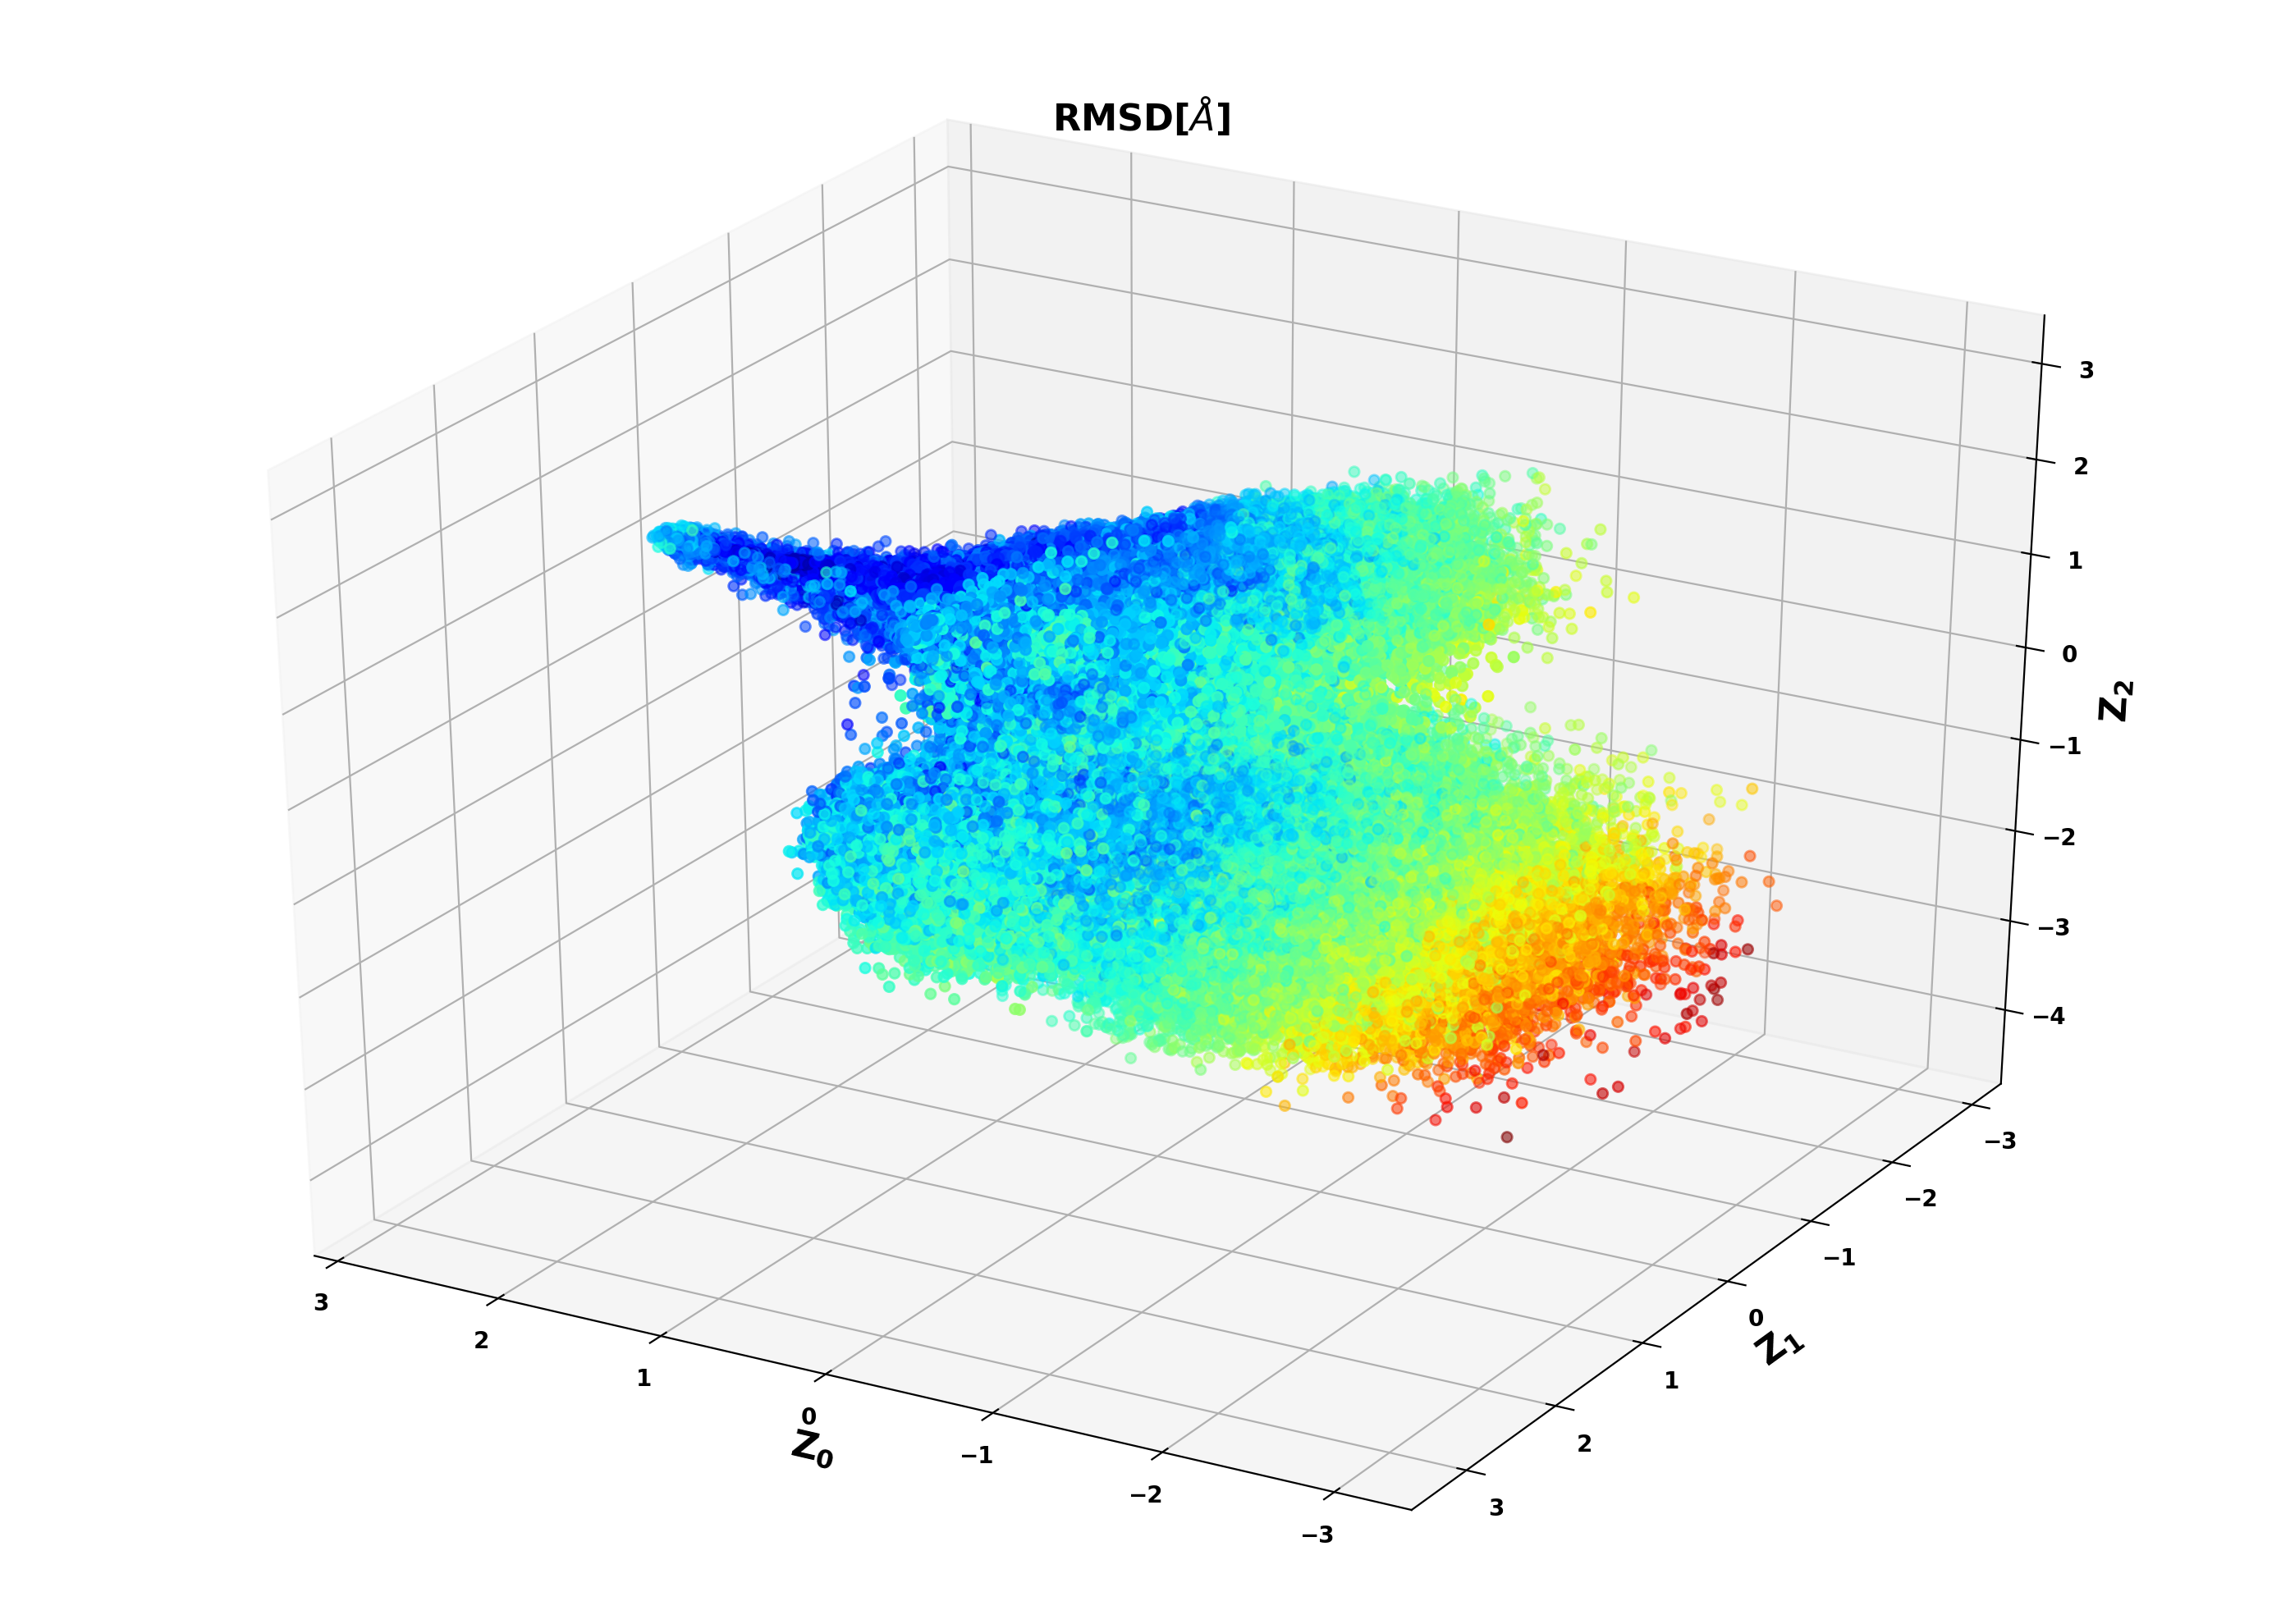

In [44]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.set_cmap('jet')
fig = plt.figure(figsize=(14,10),dpi=200)
ax = fig.add_subplot(111, projection='3d', )
myplot = ax.scatter(z_tot[:,0], z_tot[:,1], z_tot[:,2], c=rmsds[:len(z_tot)])

# Rotate the image
ax.view_init(30, # larger # goes "higher"
             120) # larger # "circles around"
ax.set_xlabel(r'$\mathbf{Z_0}$',fontweight='bold',fontsize=16)
ax.set_ylabel(r'$\mathbf{Z_1}$',fontweight='bold',fontsize=16)
ax.set_zlabel(r'$\mathbf{Z_2}$',fontweight='bold',fontsize=16)

plt.title(r'RMSD[$\AA$]',fontweight='bold', fontsize=16)


fig.tight_layout()
#plt.title('RMSD[A]')
fig.savefig('villin_RMSD.png')

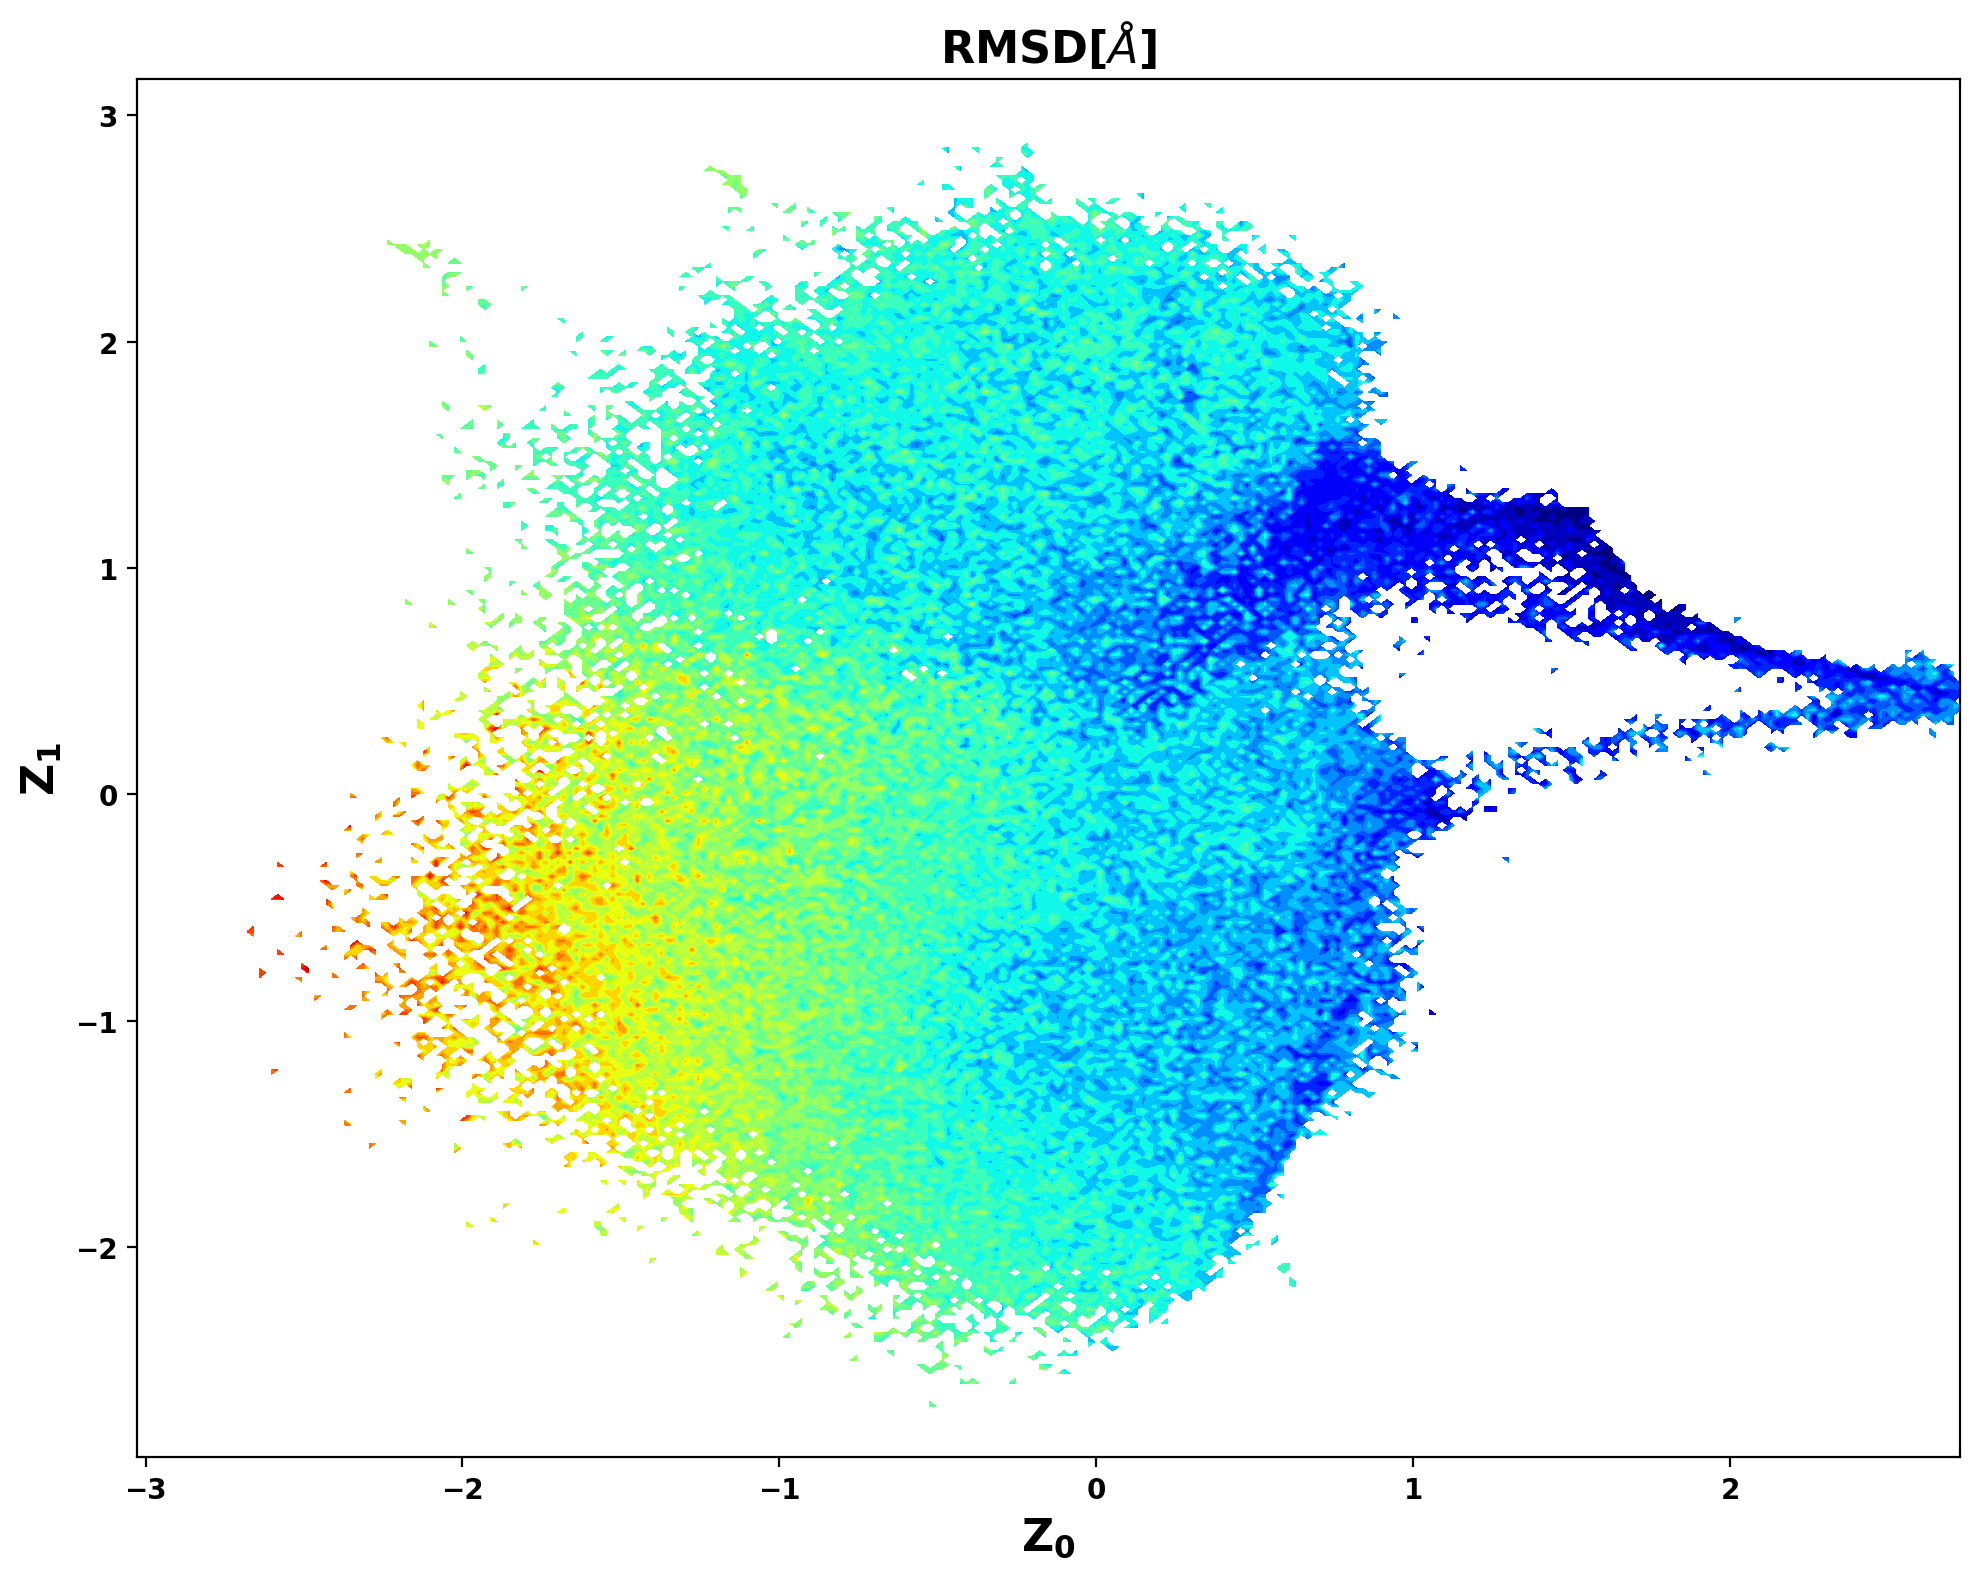

In [45]:
from matplotlib import rc, rcParams

#rcParams['text.latex.preamble'] = [r'\usepacakge{sfmath} \boldmath']

fig, ax = plt.subplots(1,1,figsize=(10,8), dpi=200)
pyemma.plots.plot_state_map(z_tot[:,0].T,z_tot[:,1].T,rmsds[:len(z_tot)],ax=ax,nbins=300,cbar=False, cmap='jet')

ax.set_xlabel(r'$\mathbf{Z_0}$',fontweight='bold',fontsize=16)
ax.set_ylabel(r'$\mathbf{Z_1}$',fontweight='bold',fontsize=16)
#ax.set_zlabel(r'$\mathbf{Z_2}$',fontweight='bold',fontsize=16)

plt.title(r'RMSD[$\AA$]',fontweight='bold', fontsize=16)
fig.tight_layout()
fig.savefig('villin_RMSD_2.png')


<Figure size 432x288 with 0 Axes>

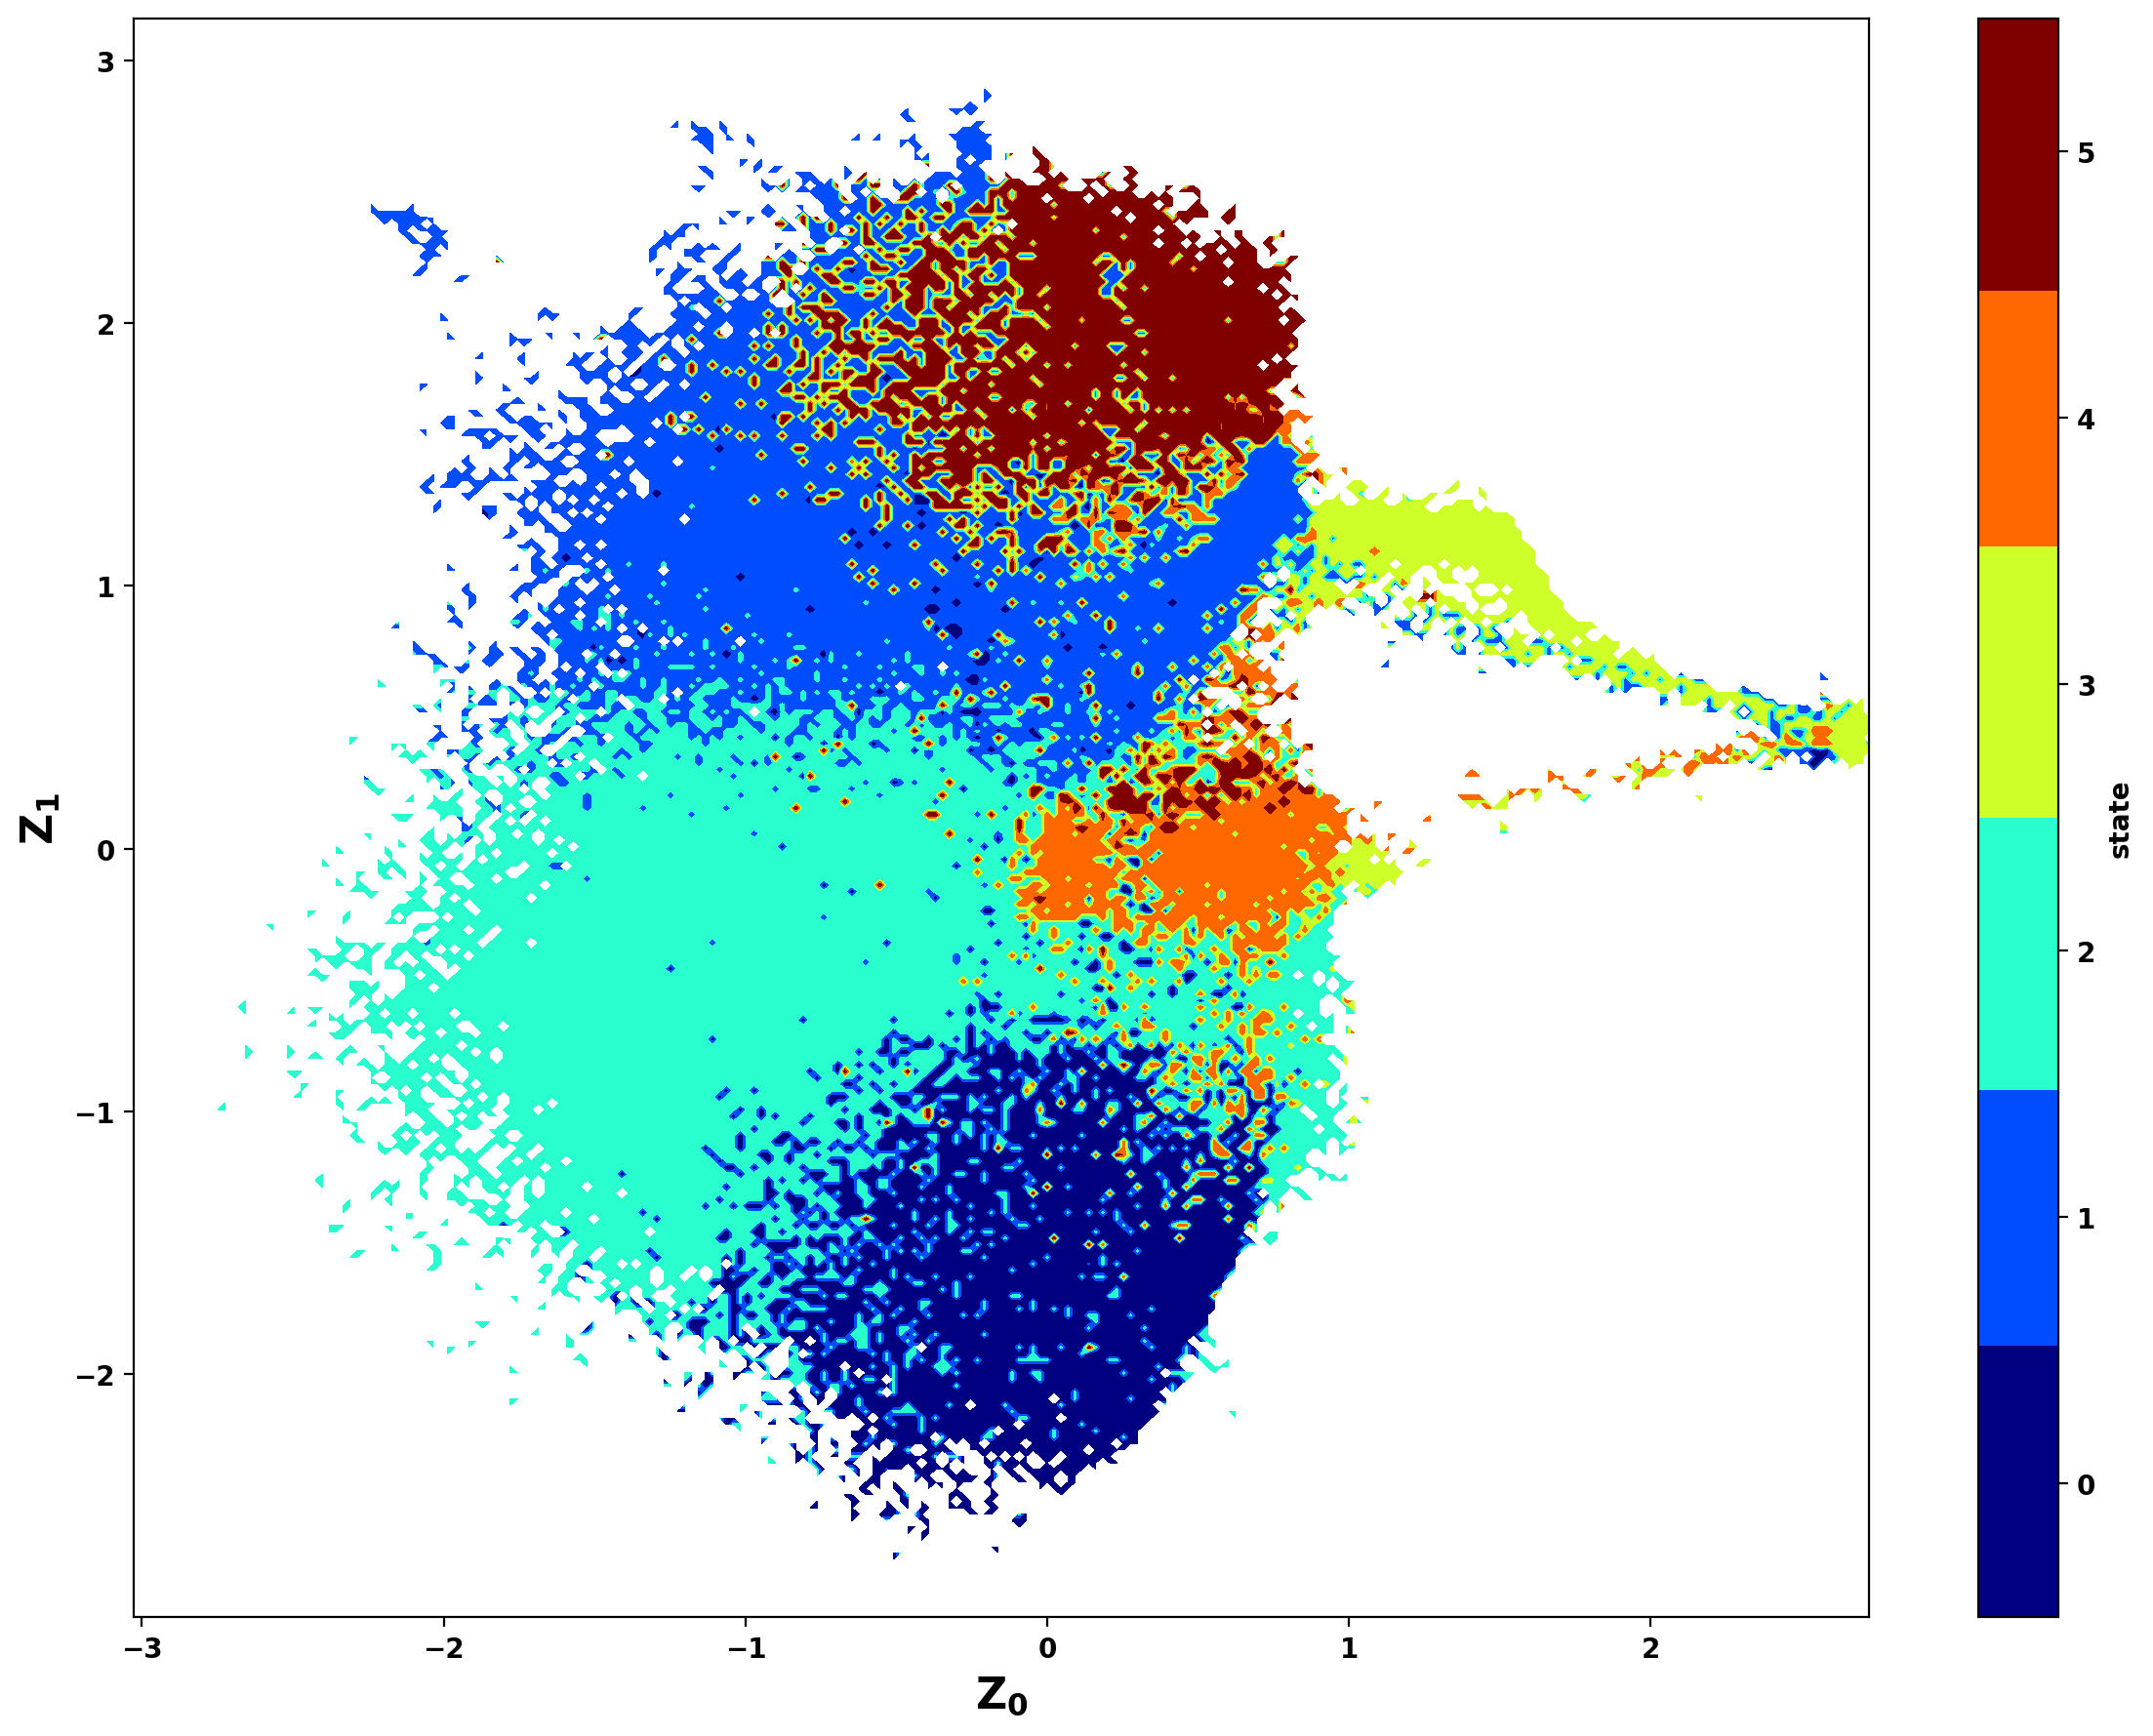

In [46]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.set_cmap('jet')
fig, ax = plt.subplots(1,1,figsize=(12,9),dpi=200)
pyemma.plots.plot_state_map(z_sel[:,0].T,z_sel[:,1].T,y_m_t,ax=ax,nbins=250)

ax.set_xlabel(r'$\mathbf{Z_0}$',fontweight='bold',fontsize=16)
ax.set_ylabel(r'$\mathbf{Z_1}$',fontweight='bold',fontsize=16)
fig.tight_layout()

fig.savefig('Villin_cluster.png')

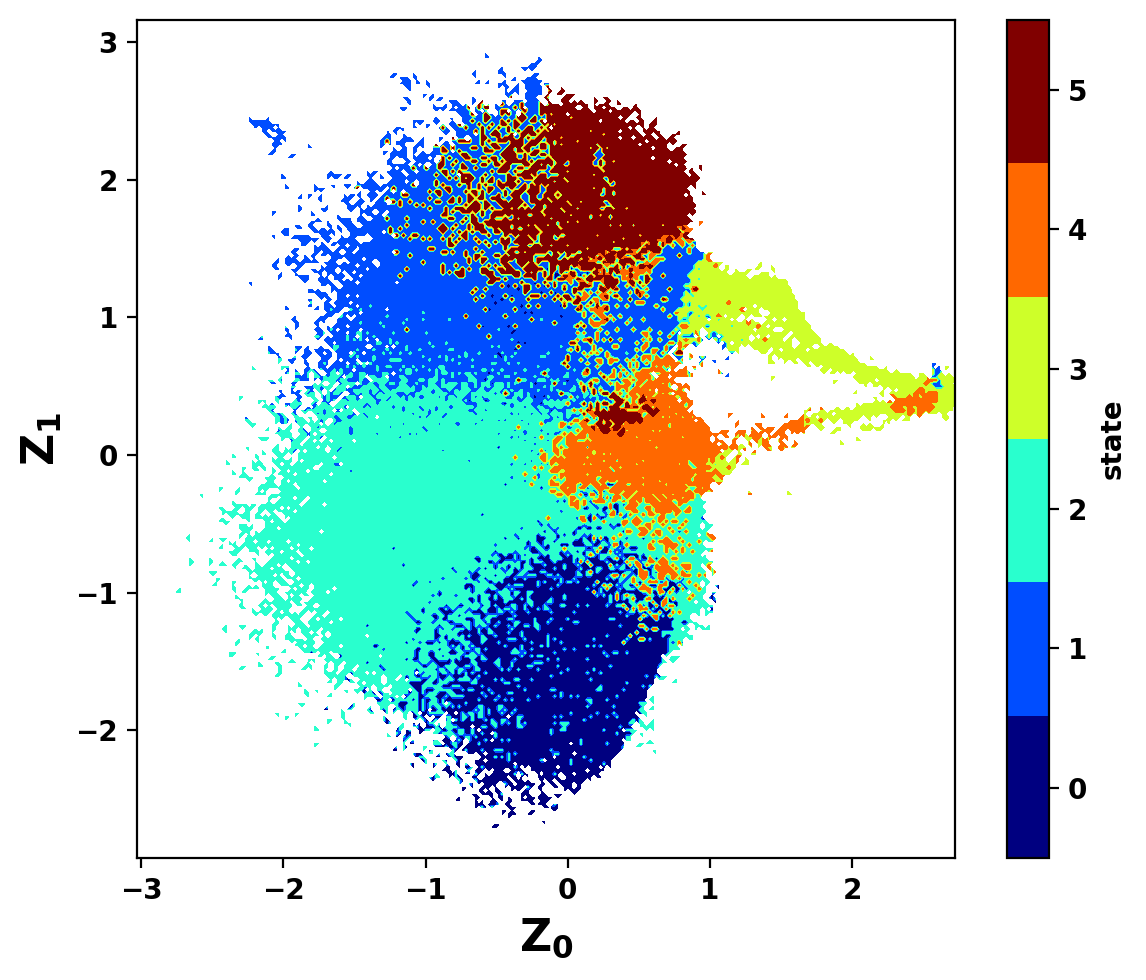

In [47]:
fig, ax = plt.subplots(1,1,figsize=(6,5),dpi=200 )
pyemma.plots.plot_state_map(z_tot[:,0].T,z_tot[:,1].T,y_assign,ax=ax,nbins=250)

ax.set_xlabel(r'$\mathbf{Z_0}$',fontweight='bold',fontsize=16)
ax.set_ylabel(r'$\mathbf{Z_1}$',fontweight='bold',fontsize=16)
fig.tight_layout()
fig.savefig('villin_cluster.png')

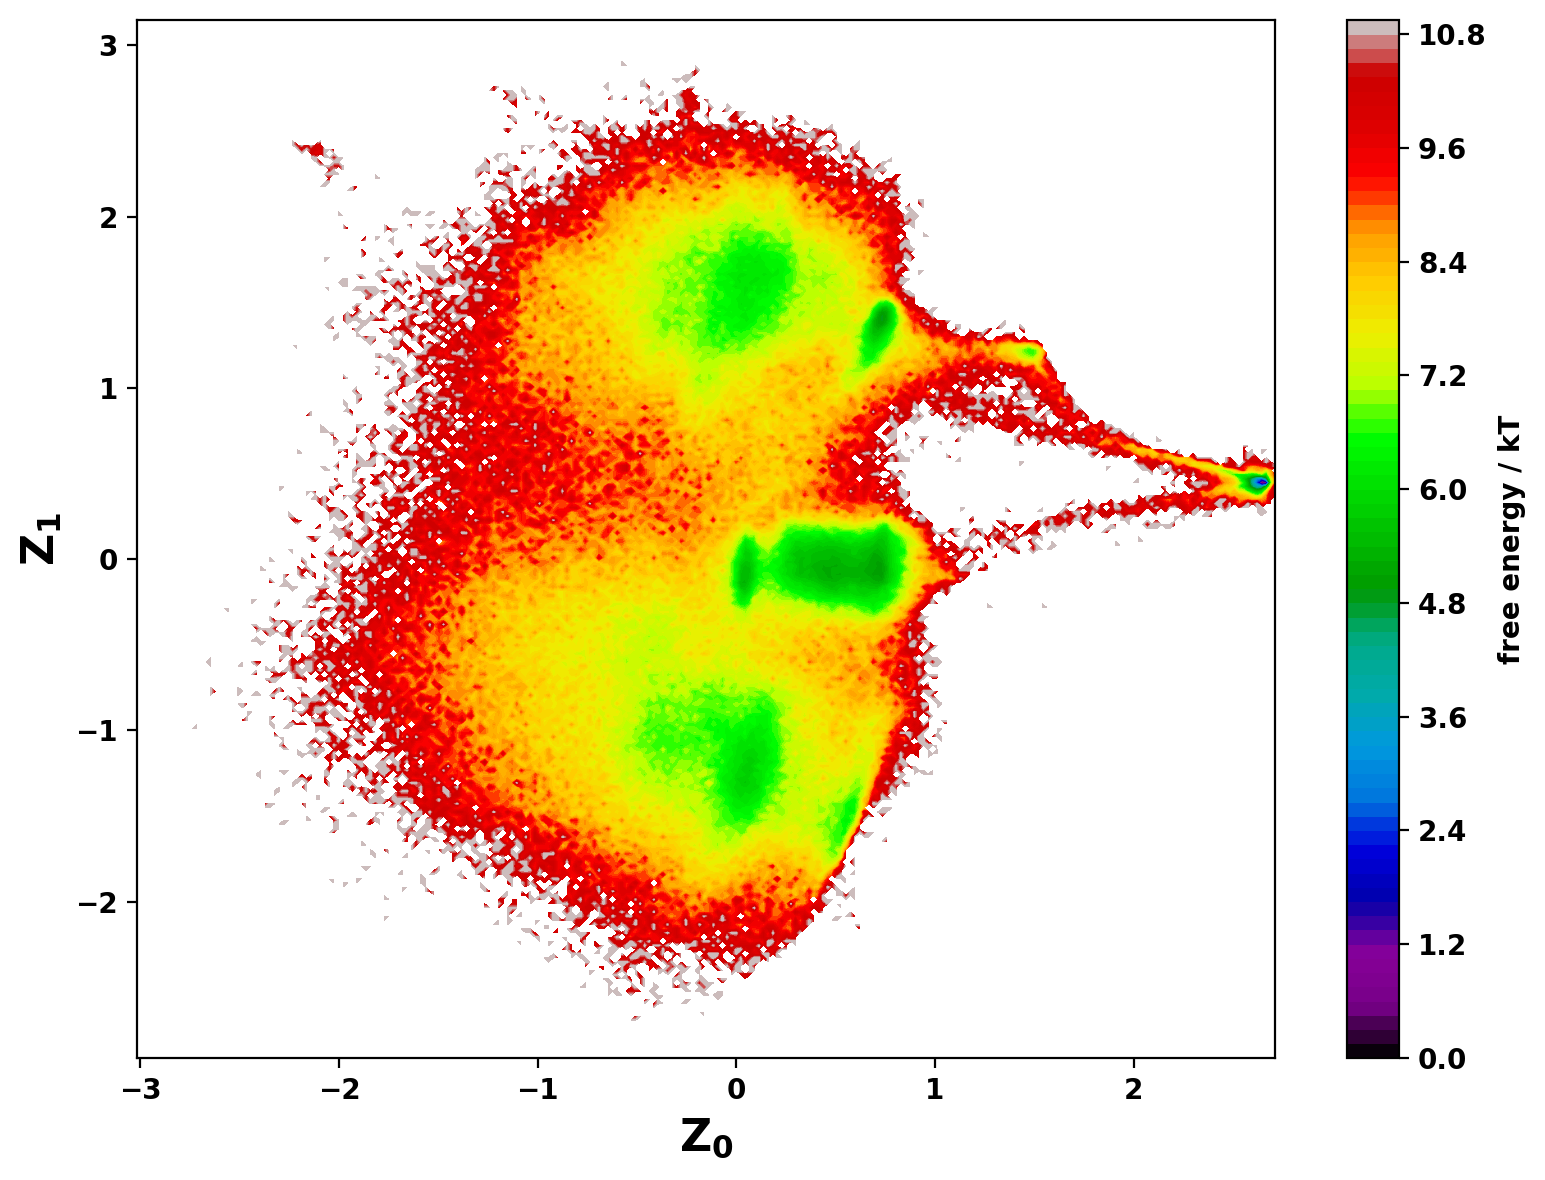

In [48]:
plt.rcParams['font.weight']='bold'
plt.rcParams['axes.labelweight']='bold'
fig, axes = plt.subplots(1,1, figsize=(8,6), dpi=200)

pyemma.plots.plot_free_energy(*z_tot[:,0:2].T,ax=axes,cbar=True,nbins=250)
axes.set_xlabel(r'$\mathbf{Z_0}$',fontweight='bold',fontsize=16)
axes.set_ylabel(r'$\mathbf{Z_1}$',fontweight='bold',fontsize=16)
fig.tight_layout()
fig.savefig('villin_FEL.png')

In [49]:
cluster = pyemma.coordinates.cluster_kmeans(z_tot, k=1000, max_iter=100, fixed_seed=1)

In [50]:
dtrajs_concatenated = np.concatenate(cluster.dtrajs)

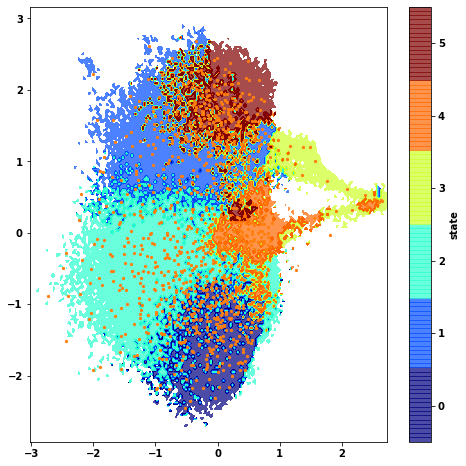

In [51]:
fig, ax = plt.subplots(figsize=(8,8))
pyemma.plots.plot_state_map(z_tot[:,0].T,z_tot[:,1].T,y_assign,ax=ax,nbins=200, alpha=0.7)
ax.scatter(*cluster.clustercenters[:,:2].T, s=5,c='C1')

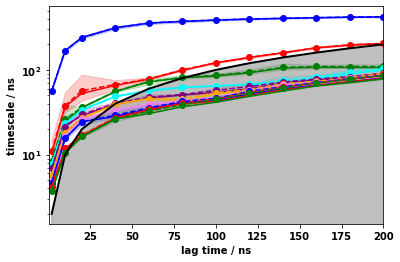

In [52]:
its = pyemma.msm.its(cluster.dtrajs, lags=[10,50,100,200,300,400,500,600,700,800,900,1000],nits=10, errors='bayes')
pyemma.plots.plot_implied_timescales(its, units='ns',dt=0.2)

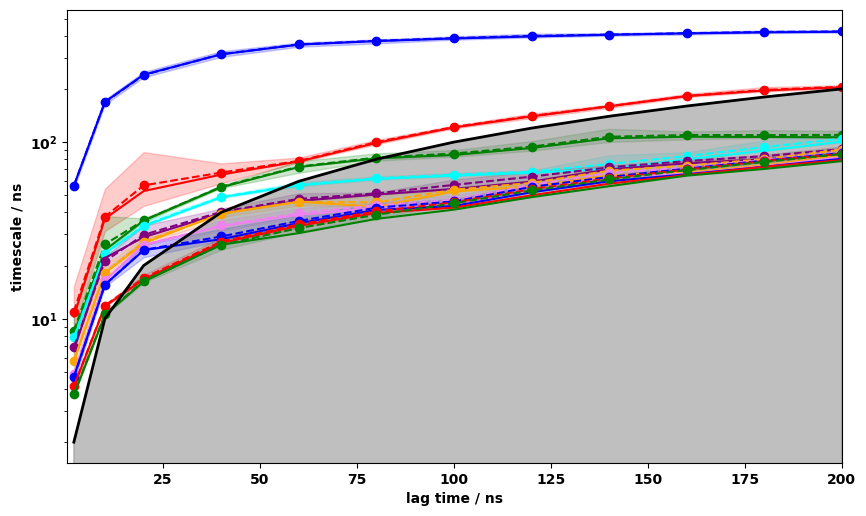

In [53]:
fig, ax = plt.subplots(figsize=(10,6),dpi=100)
pyemma.plots.plot_implied_timescales(its, units='ns',dt=0.2)
#axes.set_xlabel(r'$\mathbf{Z_0}$',fontweight='bold',fontsize=16)
fig.savefig('Villin_ITS.png')

In [54]:
msm = pyemma.msm.bayesian_markov_model(dtrajs_concatenated, lag=900, dt_traj='0.2 ns')

In [58]:
# assigning the MSM k-means centers to the nearest GMVAE cluster
n_clusters = 1000
n_neighbors = 1000
eps = 0.5
cluster_labels = np.zeros(1000)
for i in range(n_clusters):
    center = cluster.clustercenters[i]
    indices = np.argsort(((z_tot-cluster.clustercenters[i])**2).sum(axis=1))[:1000]
    y_m_cl = y_assign[indices]
    y_m_num = np.zeros(6)
    for j in range(6):
        y_m_num[j] = len(y_m_cl[y_m_cl==j])
    
    cluster_labels[i] = np.argmax(y_m_num)

In [59]:
metastable_sets = []
for i in range(6):
    a = np.argwhere(cluster_labels==i)
    a = a.reshape(len(a))
    metastable_sets.append(a)

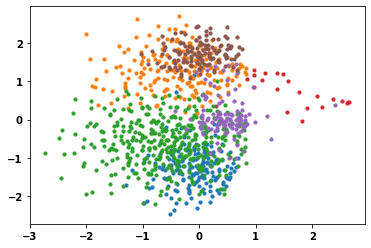

In [60]:
for i in range(6):
    plt.scatter(cluster.clustercenters[metastable_sets[i]][:,0],cluster.clustercenters[metastable_sets[i]][:,1],s=10)

In [61]:
mfpt = np.zeros((6,6))
for i in range(6):
    for j in range(6):
        mfpt[i,j] = msm.mfpt(metastable_sets[i],metastable_sets[j])*0.2

In [62]:
from pandas import DataFrame
print('MFPT/ steps')
DataFrame(np.round(mfpt, decimals=2), index=range(6), columns=range(6))

MFPT/ steps


,0,1,2,3,4,5
0,0.00,270.38,205.93,457.30,196.68,315.85
1,217.98,0.00,223.80,404.40,212.81,337.47
2,201.97,272.11,0.00,463.56,193.32,311.36
3,281.89,281.02,292.29,0.00,270.60,409.30
4,206.64,275.29,206.53,458.39,0.00,317.19
5,200.67,274.46,200.14,468.61,193.12,0.00


In [51]:
inverse_mfpt = np.zeros_like(mfpt)
nz = mfpt.nonzero()
inverse_mfpt[nz] = 1.0/mfpt[nz]

In [53]:
inverse_mfpt2 = np.copy(inverse_mfpt)
nstates=10
for i in range(nstates):
    for j in range(nstates):
        if inverse_mfpt[i,j] < 1e-3:
            inverse_mfpt2[i,j]=0

In [55]:
inverse_mfpt[0].sum()

0.01426217940042999

In [56]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]
highest_membership = msm.metastable_distributions.argmax(1) # find the highest membership 
coarse_state_centers = cluster.clustercenters[msm.active_set[highest_membership]]

In [57]:
ave = np.zeros((len(np.unique(y_m_t)),2))
for i,n in enumerate(np.unique(y_m_t)):
    ave[i,:] = z_sel[y_m_t==n].mean(axis=0)

In [226]:
Tm = msm.transition_matrix

In [227]:
T = np.zeros((6,6))
for i in range(6):
    for j in range(6):
        T[i][j] = Tm[metastable_sets[i]][:,metastable_sets[j]].sum()/Tm[metastable_sets[i]].sum()
        

In [228]:
Tt = np.zeros((6, 6))
for i in range(6):
    for j in range(6):
        Tt[i][j] = Tm[j, metastable_sets[i]].sum()

In [229]:
T2 = np.copy(Tt)
for i in range(6):
    for j in range(6):
        if Tt[i,j] < 1e-1:
            T2[i,j]=0

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


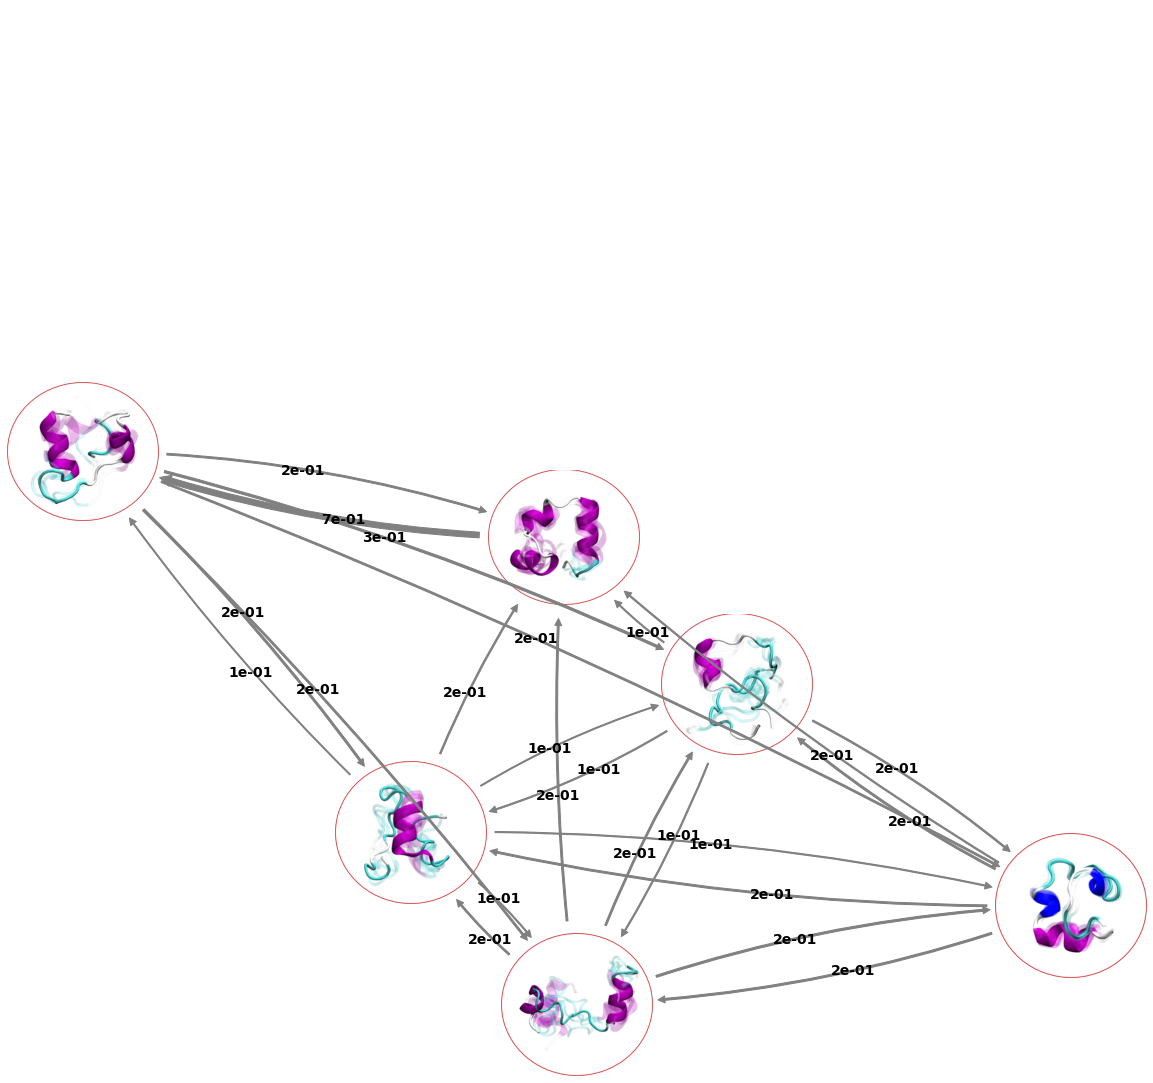

In [218]:
from matplotlib import patches
fig = plt.figure(figsize=(14,14))
gw = int(np.floor(0.5+1000*fig.get_figwidth()))
gh = int(np.floor(0.5+1000*fig.get_figheight()))
gs = plt.GridSpec(gh,gw)
gs.update(hspace=0.0, wspace=0.0, left=0.0, right=1.0, bottom=0.0, top=1.0)
ax_box = fig.add_subplot(gs[:,:])

_, coor = pyemma.plots.plot_network(T2,
                                                 minflux=1e-2,
                                                 ax=ax_box,
                                                 state_sizes=np.ones(10)*0.5,
                                                 #state_sizes=np.array([1]*msm.n_metastable), 
                                                 state_scale=2,
                                                 arrow_scale=1,
                                                 arrow_curvature=0.6,
                                                 state_colors='#ffffff',
                                                 state_labels=None,
                                                 figpadding=0.01)

#remove circles
for child in ax_box.get_children():
    if isinstance(child, patches.Circle):
        child.remove()
        
x1 = ax_box.get_xlim()
y1 = ax_box.get_ylim()
fsize = 0.15
for i, (x,y) in enumerate(coor):
    ax_ = fig.add_axes([(x-x1[0])/(x1[1]-x1[0])-fsize/2, (y-y1[0])/(y1[1]-y1[0])-fsize/2, fsize, fsize], zorder=-1)
    ax_.set_axis_off()
    ax_.imshow(plt.imread('cl_{}.png'.format(i)),zorder=-1)
    #ax_box.text(x-fsize*0.1, y-fsize*0.7, '$S_{}$'.format(i),fontsize=12, weight='heavy')
    
fig.tight_layout()
#plt.savefig('flux',dpi=300, bbox_inches='tight')

In [183]:
import networkx as nx
graph = nx.DiGraph()
graph.add_nodes_from(nodes)

In [184]:
for i in range(6):
    for j in range(6):
        if i!=j and T2[i,j]!=0:
            graph.add_edges_from([(nodes[i],nodes[j])],weight=abs(T2[i,j]))
        

In [185]:
nx.write_gexf(graph, "villin_graph.gexf")

In [173]:
top = md.load_psf('villin.psf')
top = md.load_pdb('my_vil.pdb')
trj0 = md.load_dcd('gmm_0_samples.dcd',top=top)
trj1 = md.load_dcd('gmm_1_samples.dcd', top=top)
trj2 = md.load_dcd('gmm_2_samples.dcd', top=top)
trj3 = md.load_dcd('gmm_3_samples.dcd', top=top)
trj4 = md.load_dcd('gmm_4_samples.dcd', top=top)
trj5 = md.load_dcd('gmm_5_samples.dcd', top=top)

In [174]:
ca = [a.index for a in trj1.topology.atoms if a.name=='CA']

In [175]:
gmm_0 = md.rmsd(trj0, top,0, atom_indices=ca[2:10])
gmm_1 = md.rmsd(trj1, top,0, atom_indices=ca[2:10])
gmm_2 = md.rmsd(trj2, top,0, atom_indices=ca[2:10])
gmm_3 = md.rmsd(trj3, top,0, atom_indices=ca[2:10])
gmm_4 = md.rmsd(trj4, top,0, atom_indices=ca[2:10])
gmm_5 = md.rmsd(trj5, top,0, atom_indices=ca[2:10])

<Figure size 432x288 with 0 Axes>

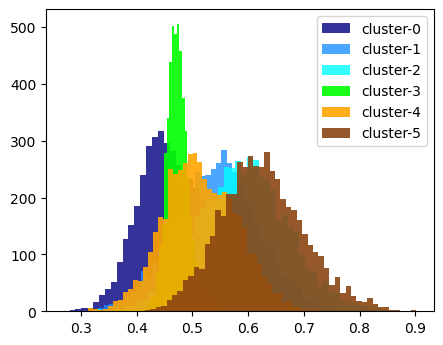

In [176]:
import seaborn as sns
plt.set_cmap('jet')
plt.figure(figsize=(5,4),dpi=100)
plt.hist(gmm_0, bins=50, alpha=0.8, label='cluster-0',color='navy');
plt.hist(gmm_1, bins=50, alpha=0.8, label='cluster-1',color='dodgerblue');
plt.hist(gmm_2, bins=50, alpha=0.8, label='cluster-2',color='cyan');
plt.hist(gmm_3, bins=50, alpha=0.9, label='cluster-3',color='lime');
plt.hist(gmm_4, bins=50, alpha=0.9, label='cluster-4',color='orange');
plt.hist(gmm_5, bins=50, alpha=0.9, label='cluster-5',color='saddlebrown');
#plt.hist(gmm_6, bins=100, alpha=0.5, label='cluster-6');
#plt.hist(gmm_7, bins=100, alpha=0.5, label='cluster-7');
#plt.hist(gmm_8, bins=100, alpha=0.5, label='cluster-8');
#plt.hist(gmm_9, bins=100, alpha=0.5, label='cluster-9');
plt.legend()
plt.savefig('dis_1.png')

In [201]:
gmm_0 = md.rmsd(trj0, top, atom_indices=ca[13:18])
gmm_1 = md.rmsd(trj1, top, atom_indices=ca[13:18])
gmm_2 = md.rmsd(trj2, top, atom_indices=ca[13:18])
gmm_3 = md.rmsd(trj3, top, atom_indices=ca[13:18])
gmm_4 = md.rmsd(trj4, top, atom_indices=ca[13:18])
gmm_5 = md.rmsd(trj5, top, atom_indices=ca[13:18])

<Figure size 432x288 with 0 Axes>

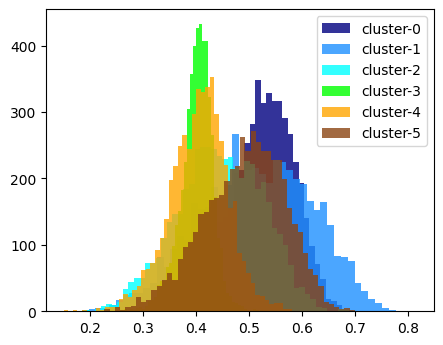

In [202]:
import seaborn as sns
plt.set_cmap('jet')
plt.figure(figsize=(5,4), dpi=100)
plt.hist(gmm_0, bins=50, alpha=0.8, label='cluster-0',color='navy');
plt.hist(gmm_1, bins=50, alpha=0.8, label='cluster-1',color='dodgerblue');
plt.hist(gmm_2, bins=50, alpha=0.8, label='cluster-2',color='cyan');
plt.hist(gmm_3, bins=50, alpha=0.8, label='cluster-3',color='lime');
plt.hist(gmm_4, bins=50, alpha=0.8, label='cluster-4',color='orange');
plt.hist(gmm_5, bins=50, alpha=0.8, label='cluster-5',color='saddlebrown');
#plt.hist(gmm_6, bins=100, alpha=0.5, label='cluster-6');
#plt.hist(gmm_7, bins=100, alpha=0.5, label='cluster-7');
#plt.hist(gmm_8, bins=100, alpha=0.5, label='cluster-8');
#plt.hist(gmm_9, bins=100, alpha=0.5, label='cluster-9');
plt.legend()
plt.savefig('dis_2.png')

In [205]:
gmm_0 = md.rmsd(trj0, top, atom_indices=ca[21:31])
gmm_1 = md.rmsd(trj1, top, atom_indices=ca[21:31])
gmm_2 = md.rmsd(trj2, top, atom_indices=ca[21:31])
gmm_3 = md.rmsd(trj3, top, atom_indices=ca[21:31])
gmm_4 = md.rmsd(trj4, top, atom_indices=ca[21:31])
gmm_5 = md.rmsd(trj5, top, atom_indices=ca[21:31])

<Figure size 432x288 with 0 Axes>

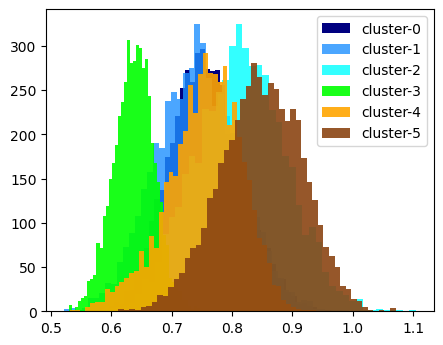

In [212]:
import seaborn as sns
plt.set_cmap('jet')
plt.figure(figsize=(5,4), dpi=100)
plt.hist(gmm_0, bins=50, alpha=1, label='cluster-0',color='navy');
plt.hist(gmm_1, bins=50, alpha=0.8, label='cluster-1',color='dodgerblue');
plt.hist(gmm_2, bins=50, alpha=0.8, label='cluster-2',color='cyan');
plt.hist(gmm_3, bins=50, alpha=0.9, label='cluster-3',color='lime');
plt.hist(gmm_4, bins=50, alpha=0.9, label='cluster-4',color='orange');
plt.hist(gmm_5, bins=50, alpha=0.9, label='cluster-5',color='saddlebrown');
#plt.hist(gmm_6, bins=100, alpha=0.5, label='cluster-6');
#plt.hist(gmm_7, bins=100, alpha=0.5, label='cluster-7');
#plt.hist(gmm_8, bins=100, alpha=0.5, label='cluster-8');
#plt.hist(gmm_9, bins=100, alpha=0.5, label='cluster-9');
plt.savefig('dis_3.png')
plt.legend()

In [135]:
dss0 = md.compute_dssp(trj0)
dss1 = md.compute_dssp(trj1)
dss2 = md.compute_dssp(trj2)
dss3 = md.compute_dssp(trj3)
dss4 = md.compute_dssp(trj4)
dss5 = md.compute_dssp(trj5)

In [136]:
tot_h0 = (dss0=='H').sum(axis=1)
tot_h1 = (dss1=='H').sum(axis=1)
tot_h2 = (dss2=='H').sum(axis=1)
tot_h3 = (dss3=='H').sum(axis=1)
tot_h4 = (dss4=='H').sum(axis=1)
tot_h5 = (dss5=='H').sum(axis=1)

In [137]:
h1_0 = (dss0[:,21:31]=='H').sum(axis=1).sum()/(10*5000)
h1_1 = (dss1[:,21:31]=='H').sum(axis=1).sum()/(10*5000)
h1_2 = (dss2[:,21:31]=='H').sum(axis=1).sum()/(10*5000)
h1_3 = (dss3[:,21:31]=='H').sum(axis=1).sum()/(10*5000)
h1_4 = (dss4[:,21:31]=='H').sum(axis=1).sum()/(10*5000)
h1_5 = (dss3[:,21:31]=='H').sum(axis=1).sum()/(10*5000)